<div  align='center'><img src='https://s3.amazonaws.com/weclouddata/images/logos/wcd_logo_new_2.png' width='15%'></div >

<p style="font-size:30px;text-align:center"><b>ML End-to-End Modeling Exercise</b></p>
<p style="font-size:20px;text-align:center"><b><font color='#F39A54'>(Student)</font></b></p>
<p style="font-size:20px;text-align:center"><b>ML Engineer Bootcamp</b></p>

<br>
<center align="center"> Designed by: </center>
<center align="center"> WeCloudData Academy </center>

## Table of Content <a name='toc'></a>
* ### [Challenge: ML with Scikit-learn](#sklearn)
    * [1 - Data Preparation](#sklearn-data-prep)
    * [2 - Sampling and Data Split](#sklearn-split)
    * [3 - Data Exploration](#sklearn-explore)
    * [4 - Feature Prerprocessing](#sklearn-feature)
    * [5 - Feature Selection](#sklearn-feature-selection)
    * [6 - Model Fitting](#sklearn-fit)
    * [7 - Model Evaluation](#sklearn-eval)
    * [8 - Hyper-parameter Tuning](#sklearn-tuning)
    * [9 - Cross-Validation](#sklearn-cv)
    * [10 - Interpretation](#sklearn-explain)



## Goal of this exercise:

> During the first two weeks of the Bootcamp, we reviewed some classic ML algorithms. In practice, machine learning engineers and dats scientists spend quite a bit effort on data preparation, feature engineering, and ml pipelines. In the later half of deep learning, we will focus more on unstructured data such as images and text. So we'd like to give everyone a chance to complete an end to end ML pipeline (training your models up to evaluation). This will help us get prepared for term 2: MLOps, where we will be deploying the model we build in this exercise.  

### Requirements

1. Follow these steps to complete the model building (you don't have to stick to it as some data scientists prefer to have slightly different process)
2. After training your models in the jupyter notebook, try to implement that in VSCode using python scripts. 

### Bonus points
3. Try to modularize your code as much as possible
4. Try to leverage ML pipeline features in scikit-learn [reference](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html)
5. Try to add customer transformer for feature engineering [example](https://www.section.io/engineering-education/custom-transformer/)

### Other notes
1. This is not an exam. No need to panic. 
2. Once you upload your solution, we will provide code review and give you feedback. 

In [1]:
import pandas as pd
import numpy as np
import scipy as sp

import matplotlib.pyplot as plt 
%matplotlib inline

pd.set_option('display.max_columns', None)  # allows displaying all columns in a dataframe 
pd.set_option('display.max_rows', 50)


---

# $\Sigma$ 5. Challenge: ML Classification with Scikit-learn <a name="sklearn"></a></a><font size='3'>[Back to TOC](#toc)</font>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import StandardScaler

## 5.1 - Data Preparation <a name="sklearn-data-prep"></a><font size='3'>[Back to TOC](#toc)</font>

In scikit-learn, we chose a representation of data that is as close as possible to the matrix representation. Datasets are encoded as NumPy multidimensional arrays for dense data and SciPy sparse matrices for sparse data

<img src='https://s3.amazonaws.com/weclouddata/images/python/ml_data_extraction.png' width='50%'>

One of the most critical steps in machine learning and predictive modeling is to create the modeling dataset. For classic machine learning problems, we usually prepare the data into a structured table that has **`one row per user|document|image`**, and the **`columns representing the features`**, and **`one of the columns representing the labels|target`1**. 

<img src='https://s3.amazonaws.com/weclouddata/images/python/ml_model_dataset.png' width='50%'>

### $\Delta$ 5.1.1 - Load ML Data  <font size='3'>[Back to TOC](#toc)</font>

The data in this tutorial comes from the [Kaggle challenge](https://www.kaggle.com/c/GiveMeSomeCredit), which requires participants to improve on the state of the art in credit scoring, by predicting the probability that somebody will experience financial distress in the next two years.

https://www.kaggle.com/general/74235

#### <font color='#FC7307'> $\delta$  Instruction

- The dataset can be downloaded from the Kaggle link above 
- Read and display the data
- Explore the dimensions of the data

In [3]:
! pip install -q kaggle

In [4]:
from google.colab import files

In [5]:
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle.json': b'{"username":"aliclinton","key":"907b8d30d578d9af55464e42aa470fb9"}'}

In [6]:
!mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [7]:
!cp kaggle.json ~/.kaggle/

In [8]:
!chmod 600 ~/.kaggle/kaggle.json

In [9]:
!kaggle competitions download -c GiveMeSomeCredit

GiveMeSomeCredit.zip: Skipping, found more recently modified local copy (use --force to force download)


In [10]:
!mkdir credit

mkdir: cannot create directory ‘credit’: File exists


In [11]:
!unzip GiveMeSomeCredit.zip -d credit

Archive:  GiveMeSomeCredit.zip
replace credit/Data Dictionary.xls? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: credit/Data Dictionary.xls  
replace credit/cs-test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: a
error:  invalid response [a]
replace credit/cs-test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: credit/cs-test.csv      
  inflating: credit/cs-training.csv  
  inflating: credit/sampleEntry.csv  


In [13]:
cs_training_df.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [14]:
cs_training_df[['SeriousDlqin2yrs']]

,SeriousDlqin2yrs
1,1
2,0
3,0
4,0
5,0
...,...
149996,0
149997,0
149998,0
149999,0


In [15]:
cs_training_df.shape

(150000, 11)

> So in this credit dataset, we have 150000 customers with 11 predictors

## 5.2 - Sampling and Data Split <a name="sklearn-split"></a><font size='3'>[Back to TOC](#toc)</font>


### $\Delta$ 5.2.1 - Sampling  <font size='3'>[Back to TOC](#toc)</font>

> When you have a large dataset, you can take a random sample or stratified sample and train the models on a subset on your laptop
> - `pandas.sample` or equivalent can be used for sampling. 

**Since the dataset is not very big, we decide NOT to do sampling. **


### $\Delta$ 5.1.2 - Data Splitting  <font size='3'>[Back to TOC](#toc)</font>


#### <font color='#FC7307'> $\delta$  Instruction

- Split your data into train and test
- Use 20% for testing

> Hint: `train_test_split` function in sklearn
    > set random_state=20210210

In [114]:
##################################
### Your Code Below
##################################

# split data into training(70%) and testing(30%); set a random seed for the sake of reproducibility
X_train, X_test, y_train, y_test = train_test_split(cs_training_df.iloc[:,1:], cs_training_df.iloc[:,0], test_size=0.3, random_state=20210210)


## 5.3 - Data Exploration <a name="sklearn-explore"></a><font size='3'>[Back to TOC](#toc)</font>


### $\Delta$ 5.3.1 - Explore the target distribution (default rate) <a name="env-variables"></a><font size='3'>[Back to TOC](#toc)</font>

> Column `SeriousDlqin2yrs` is the target variable we're interested in modeling. 


#### <font color='#FC7307'> $\delta$  Instruction
    
- The target variable is `SeriousDlqin2yrs`. It's an indicator of serious delinquncy in past 2 years. 
- Check the default/delinquent rate in the training dataset.
- Plot the target variable distribution using matplotlib or pd.series.plot() or df.plot()

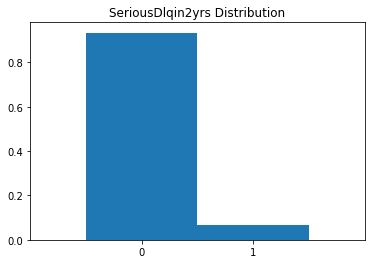

In [115]:
from matplotlib import patches
###################################
### Your Code Below
###################################
plt.figure()
n, bins, patches = plt.hist(y_train, bins=[-0.5,0.5,1.5],density=True)
plt.xticks([0,1])
plt.xlim([-1, 2])
plt.title('SeriousDlqin2yrs Distribution')
plt.show()

The default rate is 6.684%, implying this is an imbalanced classification problem. You can revisit the dataset later when we finish the discussions about the imbalanced classification topic.
By the way, 6.684% default rate in credit card portfolio is actually much higher than the actual numbers in big banks. Therefore, in reality the degree of imbalance is even more severe.

### $\Delta$ 5.3.2 - Univariate Data Exploration <a name="env-variables"></a><font size='3'>[Back to TOC](#toc)</font>

#### <font color='#FC7307'> $\delta$ Instructions

- Calculate summary statistics for numerical variables (df.describe??)
- Plot the histogram of each numeric feature (or one of them)
- Plot the boxplot of each numeric feature
- Plot the pariplot using seaborn's `sns.pairplot` module

In [116]:
##########################
# Your Code Below
##########################

X_train.describe()


,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,105000.000000,105000.000000,105000.000000,105000.000000,8.406600e+04,105000.000000,105000.000000,105000.000000,105000.000000,102225.00000
mean,5.627862,52.336219,0.430076,350.249412,6.646841e+03,8.445000,0.273733,1.019419,0.247667,0.75594
std,204.362107,14.782867,4.286012,1728.689059,1.255649e+04,5.128851,4.262450,1.120198,4.248958,1.11630
min,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.00000
25%,0.029671,41.000000,0.000000,0.175365,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.00000
50%,0.153441,52.000000,0.000000,0.367499,5.397500e+03,8.000000,0.000000,1.000000,0.000000,0.00000
75%,0.559215,63.000000,0.000000,0.875533,8.220000e+03,11.000000,0.000000,2.000000,0.000000,1.00000
max,29110.000000,109.000000,98.000000,329664.000000,1.794060e+06,57.000000,98.000000,25.000000,98.000000,20.00000


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

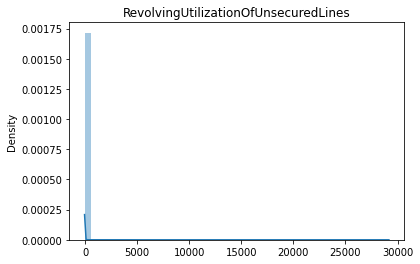

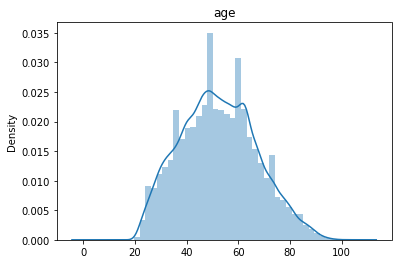

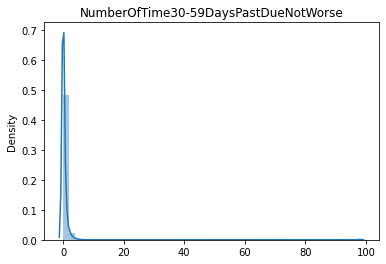

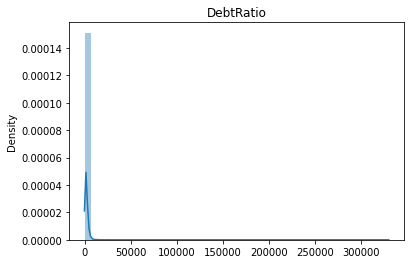

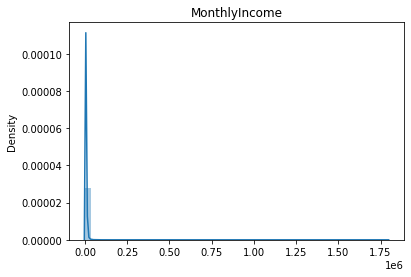

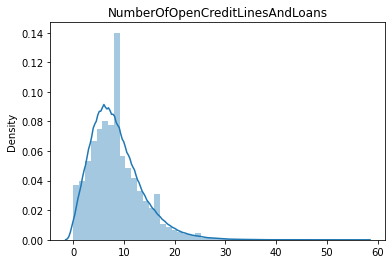

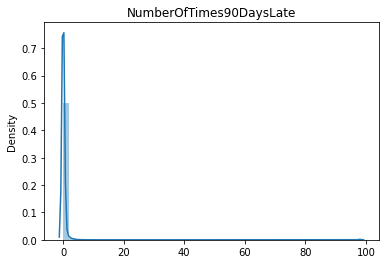

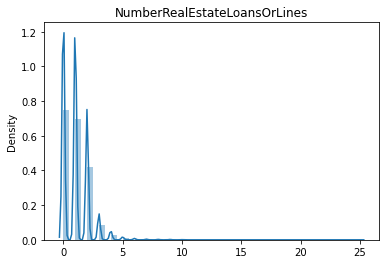

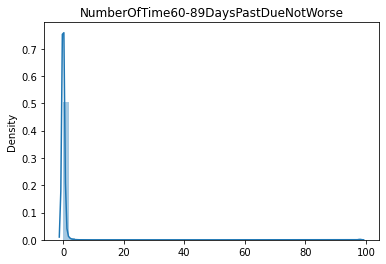

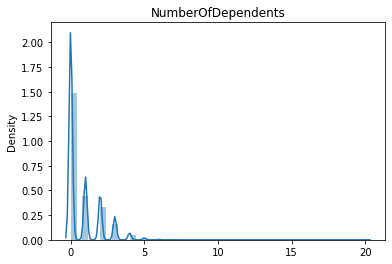

In [117]:
target_columns = X_train.columns
for i, col in enumerate(target_columns):
    plt.figure(i)
    sns.distplot(X_train[[col]])
    plt.title(col)
plt.show()

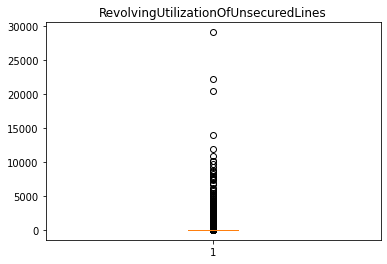

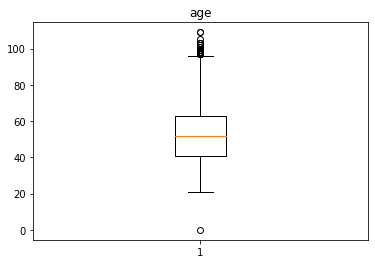

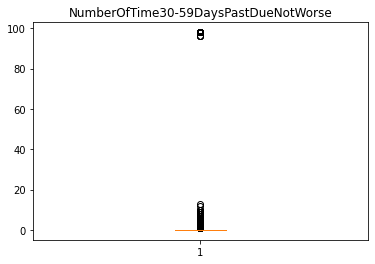

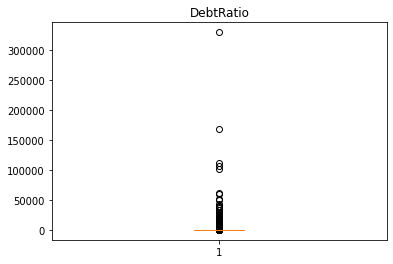

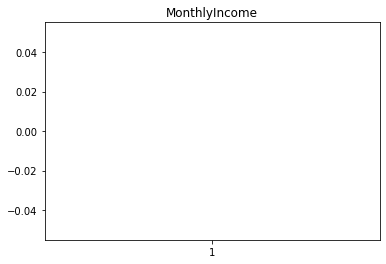

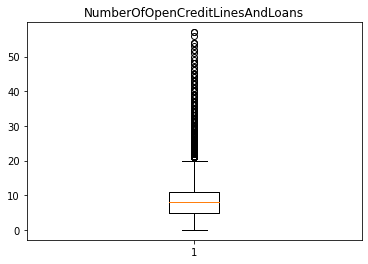

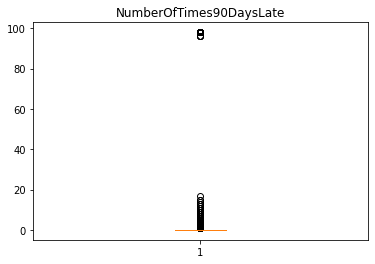

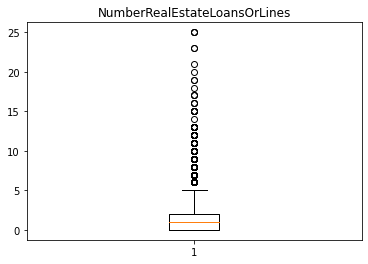

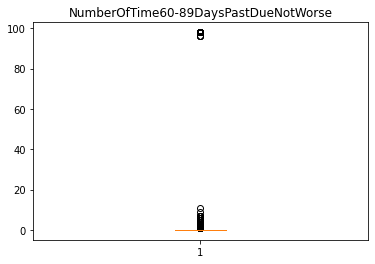

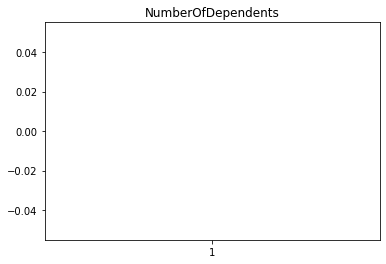

In [118]:

for i, col in enumerate(target_columns):
  plt.figure(i)
  plt.boxplot(X_train[[col]].values)
  plt.title(col)
plt.show()

**Note**
> Looks like some features have outliers. We can either deal with the outlier or choose an algorithm that is immune to outliers

#### <font color='#FC7307'> $\delta$ Deal with Categorical Variables
    
    
**Instructions**

- Create a categorical variable named `age_group` (Hint: pd.cut)
- Add the `age_group` variable to the dataframe
- Then explore the categorical feature `age_group` (Hint: bar plot, frequency count?)

Distribution not exaclty center so we will cut these into quantiles

In [119]:
##########################
# Your Code Below
##########################

def create_group(df, col, bins, labels):
  output = pd.cut(df[col], bins = bins, labels = labels).cat.codes
  return output

bins = pd.IntervalIndex.from_tuples([(-1, 20), (20, 30), (30, 40), (40, 50), (50, 60), (60, 70), (70, 80), (80,X_train.age.max())])
X_train['age_group'] = create_group(X_train, 'age', bins, None)
X_test['age_group'] = create_group(X_test, 'age', bins, None)




#### <font color='#FC7307'> $\delta$ Check missing values

**Instructions**
    
- Find columns that have missing values

In [120]:
##########################
# Your Code Below
##########################

def find_missing_columns(df):
  return df.columns[df.isnull().any()].tolist()

find_missing_columns(X_train)



['MonthlyIncome', 'NumberOfDependents']

In [121]:
X_train[X_train.age_group.isna()]

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,age_group


### $\Delta$ 5.3.3 - Bivariate Data Exploration <a name="env-variables"></a><font size='3'>[Back to TOC](#toc)</font>


#### <font color='#FC7307'> $\delta$ Correlation Table
    
**Instruction**
    
- Can you create a correlation table and use dataframe style to apply background_gradient? 
    - Hint: df.corr()?

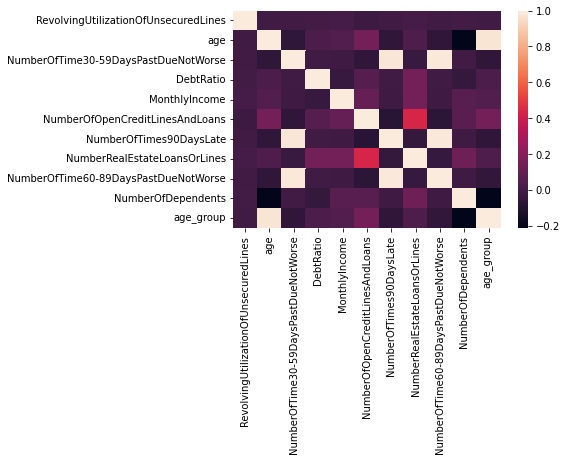

In [122]:
##########################
# Your Code Below
##########################



def correlation_heatmap(df):
  corr = df.corr()
  return sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

correlation_heatmap(X_train)


---

## 5.4 - Feature Preprocessing <a name="sklearn-feature"></a><font size='3'>[Back to TOC](#toc)</font>


### $\Delta$ 5.4.1 - Outliers <a name="outlier"></a><font size='3'>[Back to TOC](#toc)</font>


- Outliers will negatively affect the performance of our model, sklearn carries some packages that removes outliers based on the IQR.
- Let's remove the values for each column that are beyond the IQR range.
- We can either drop outliers our we can use the RobustScaler from sklearn to handle outliers.

#### <font color='#FC7307'> $\delta$ Deal with outliers

**Instruction**
- Find one of the variables with outliers and either replace the outliers with some values or remove the outliers
- You may also want to look into `from sklearn.preprocessing import RobustScaler`. It's ok to skip this step if time doesn't allow



In [123]:
##########################
# Your Code Below
##########################

from sklearn.preprocessing import RobustScaler

def outlier_processing(df):
  transformer = RobustScaler().fit_transform(df)
  output_df = pd.DataFrame(transformer)
  output_df.columns = df.columns
  return output_df

X_train = outlier_processing(X_train)
X_train.describe()
X_test = outlier_processing(X_test)

### $\Delta$ 5.4.2 - Missing Value Imputation <a name="missing"></a><font size='3'>[Back to TOC](#toc)</font>


#### <font color='#FC7307'> $\delta$ Missing Imputation for NumberOfDependents
    
**Instruction**
    
- Fill missing values with `0`
- Apply the imputation to both train and test data
    - hint: df.fillna()

In [124]:
##########################
# Your Code Below
##########################

def missing_value_processing(df, col, value):
  return df[col].fillna(value)

X_train['NumberOfDependents'] = missing_value_processing(X_train, 'NumberOfDependents', 0)
X_test['NumberOfDependents'] = missing_value_processing(X_test, 'NumberOfDependents', 0)






#### <font color='#FC7307'> $\delta$ Missing Imputation for MonthlyIncome

Around 19.8% of people do not have MonthlyIncome (could be an issue since MonthlyIncome is generally believed as an important predictor). The median values by each group (i.e. default/non-default) is chosen to fill in the NAs. Be careful that in order to do it, you have to split your data into training and testing first. 

**Instruction**
    
- Fill missing values with median value
- Apply the imputation to both train and test data
    - hint: df.fillna()

In [125]:
##########################
# Your Code Below
##########################

X_train['MonthlyIncome'] = missing_value_processing(X_train, 'MonthlyIncome', X_train['MonthlyIncome'].median())
X_test['MonthlyIncome'] = missing_value_processing(X_test, 'MonthlyIncome', X_test['MonthlyIncome'].median())

In [126]:
X_train

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,age_group
0,0.770257,-0.545455,0.0,-0.329995,2.158195,-0.666667,0.0,0.0,0.0,0.0,-1.0
1,-0.157011,0.136364,0.0,0.343757,0.228112,-0.333333,0.0,0.0,0.0,0.0,0.0
2,-0.289760,0.818182,0.0,2580.282818,0.000000,-0.500000,0.0,0.0,0.0,0.0,0.5
3,1.371851,0.363636,0.0,0.121991,0.058610,1.500000,0.0,0.5,0.0,1.0,0.0
4,0.974381,0.090909,0.0,-0.048670,2.770228,0.333333,0.0,0.5,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
104995,-0.045876,0.318182,0.0,-0.044071,1.681017,1.500000,0.0,0.5,0.0,0.0,0.0
104996,0.421855,-1.000000,0.0,0.176067,-0.074170,1.166667,0.0,0.5,0.0,0.0,-1.5
104997,0.952010,0.681818,0.0,-0.217010,0.781846,0.333333,0.0,0.0,0.0,0.0,0.5
104998,-0.289760,-0.363636,0.0,-0.435760,-0.388485,-0.500000,0.0,-0.5,0.0,1.0,-0.5


## 5.5 - Feature Selection <a name="sklearn-feature-selection"></a><font size='3'>[Back to TOC](#toc)</font>


- NumberOfTime30-59DaysPastDueNotWorse, NumberOfTimes90DaysLate and NumberOfTime60-89DaysPastDueNotWorse have a high correlation with each other, let's remove some of these features so we don't have any multicollinearity.
    - Let's remove some of these features.
- After training your model, during the model interpretation stage (5.10), you may realize that some of the features have little to no importance / impact , you can repeat this and remove some of the features later


#### <font color='#FC7307'> $\delta$ Feature Selection
    
    
**Instruction**
    
- Use the correlation table to identify highly correlated features
- Drop the redundant features. 
    - hint: df.drop()
    
- If you have time later, look into a better way to remove redundant features. 

**Reference**
- [https://scikit-learn.org/stable/modules/feature_selection.html](https://scikit-learn.org/stable/modules/feature_selection.html)

In [129]:
##########################
# Your Code Below
##########################
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectFromModel

def feature_selection(X_train, X_test, y):
  clf = ExtraTreesClassifier(n_estimators=50)
  clf = clf.fit(X_train, y)
  model = SelectFromModel(clf, prefit=True)
  X_train_output = model.transform(X_train)
  X_train_output = pd.DataFrame(X_train[X_train.columns[model.get_support()]])
  X_test_output = pd.DataFrame(X_test[X_test.columns[model.get_support()]])

  return X_train_output, X_test_output

X_train_feature_selection, X_test_feature_selection = feature_selection(X_train,X_test,y_train)





/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


## 5.6 - Model Fitting <a name="sklearn-fit"></a><font size='3'>[Back to TOC](#toc)</font>


#### <font color='#FC7307'> $\delta$ Modelling


**Instruction**

1. Pick one of the algorithms learned today: `statsmodels.OLS` or skleanr's `RandomForestClassifier` 2. Instantiate the model instance
3. Fit the model to the training set (X_train, y_train)
4. Use the model to predict on the testing set (X_test)
5. Use evaluation metric to see how model is performing (classification_report)

In [130]:
##########################
# Your Code Below
##########################
from sklearn import metrics
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_train_feature_selection, y_train)
y_pred = clf.predict(X_test_feature_selection)
print("Mean squared error: {}".format(metrics.mean_squared_error(y_test, y_pred)))
print("Mean absolute error: {}".format(metrics.mean_absolute_error(y_test, y_pred)))




Mean squared error: 0.06853333333333333
Mean absolute error: 0.06853333333333333


## 5.7 - Model Evaluation <a name="sklearn-eval"></a><font size='3'>[Back to TOC](#toc)</font>


- The classification report will return a summary of useful metrics to help with model evaluation.

#### <font color='#FC7307'> $\delta$ Baseline Model Evaluation
    
**Instruction**
    
- Can you tell us the accuracy or precision of your model evaluated on the test data? 
    - Hint: Use sklearn's `classification_report` or `sklearn.metrics.accuracy_score`

In [131]:
##########################
# Your Code Below
##########################

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.93      1.00      0.96     41916
           1       0.00      0.00      0.00      3084

    accuracy                           0.93     45000
   macro avg       0.47      0.50      0.48     45000
weighted avg       0.87      0.93      0.90     45000



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## 5.8 - Hyper-Parameter Tuninng & Cross Validation <a name="sklearn-eval"></a><font size='3'>[Back to TOC](#toc)</font>


In [135]:
grid = {
    'max_depth' : [2,3,4,5],
    'criterion' :['gini', 'entropy'],
    'random_state' : [69]
}
clf_GridSearchCV = GridSearchCV(estimator=RandomForestClassifier(), param_grid=grid, cv=5)
clf_GridSearchCV.fit(X_train_feature_selection, y_train)
y_pred_gscv = clf.predict(X_test_feature_selection)
print("Mean squared error: {}".format(metrics.mean_squared_error(y_test, y_pred_gscv)))
print("Mean absolute error: {}".format(metrics.mean_absolute_error(y_test, y_pred_gscv)))

print(classification_report(y_test, y_pred_gscv))



Mean squared error: 0.06853333333333333
Mean absolute error: 0.06853333333333333
              precision    recall  f1-score   support

           0       0.93      1.00      0.96     41916
           1       0.00      0.00      0.00      3084

    accuracy                           0.93     45000
   macro avg       0.47      0.50      0.48     45000
weighted avg       0.87      0.93      0.90     45000



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## 5.9 - Model Interpretation <a name="sklearn-eval"></a><font size='3'>[Back to TOC](#toc)</font>


In [ ]:
##########################
# Your Code Below
##########################

